In [1]:
import os
import json

# Path to the folder containing images
image_folder = "/home/sdavuluri2/workspace/data/layout"

# Path to the label JSON file
label_file = "/home/sdavuluri2/workspace/data/train_lables.json"

# Count the number of images in the folder
num_images_in_folder = len([name for name in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, name))])

# Read the label file
with open(label_file, 'r') as f:
    labels = json.load(f)

# Get the length of the label file
len_label_file = len(labels)

In [2]:
labels = {key: str(value) for key, value in labels.items()}

In [3]:
num_images_in_folder,len_label_file

(31689, 31689)

In [10]:
# # Remove image names from the label file that are not present in the folder
# labels = {key: value for key, value in labels.items() if key in os.listdir(image_folder)}

# # Write the modified label file back
# with open(label_file, 'w') as f:
#     json.dump(labels, f)
# print("Number of images in the folder:", num_images_in_folder)
# print("Length of the label file before removing:", len_label_file)
# print("Length of the label file after removing:", len(labels))

Number of images in the folder: 31689
Length of the label file before removing: 35323
Length of the label file after removing: 31689


In [70]:
labels

{'layout_3128670.jpeg': '0',
 'layout_3195735.jpeg': '2',
 'layout_3126115.jpeg': '-1',
 'layout_3157394.jpeg': '0',
 'layout_3113720.jpeg': '2',
 'layout_3129128.jpeg': '-1',
 'layout_3127941.jpeg': '0',
 'layout_3188923.jpeg': '1',
 'layout_3188172.jpeg': '6',
 'layout_3188882.jpeg': '0',
 'layout_3190538.jpeg': '2',
 'layout_3124055.jpeg': '-1',
 'layout_3115182.jpeg': '7',
 'layout_3157016.jpeg': '0',
 'layout_3127839.jpeg': '5',
 'layout_3221053.jpeg': '2',
 'layout_3114356.jpeg': '0',
 'layout_3132732.jpeg': '7',
 'layout_3115005.jpeg': '11',
 'layout_3192533.jpeg': '2',
 'layout_3123011.jpeg': '-1',
 'layout_3122358.jpeg': '0',
 'layout_3186154.jpeg': '0',
 'layout_3195807.jpeg': '0',
 'layout_3125477.jpeg': '0',
 'layout_3132556.jpeg': '1',
 'layout_3122442.jpeg': '0',
 'layout_3145985.jpeg': '-1',
 'layout_3150315.jpeg': '0',
 'layout_3146163.jpeg': '0',
 'layout_3124050.jpeg': '0',
 'layout_3123606.jpeg': '5',
 'layout_3189475.jpeg': '2',
 'layout_3127962.jpeg': '3',
 'layout

In [3]:
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

/home/sdavuluri2/intern/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# class CustomDataset1(Dataset):
#     def __init__(self, root_dir, labels, transform=None):
#         self.root_dir = root_dir
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         img_name = os.path.join(self.root_dir, list(self.labels.keys())[idx])
#         image = Image.open(img_name).convert('RGB')
#         label = self.labels[list(self.labels.keys())[idx]]
#         if self.transform:
#             image = self.transform(image)
#         return image, label

# # Define transformations
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
# ])

# # Create custom dataset
# custom_dataset1 = CustomDataset1(root_dir=image_folder, labels=labels, transform=transform)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}


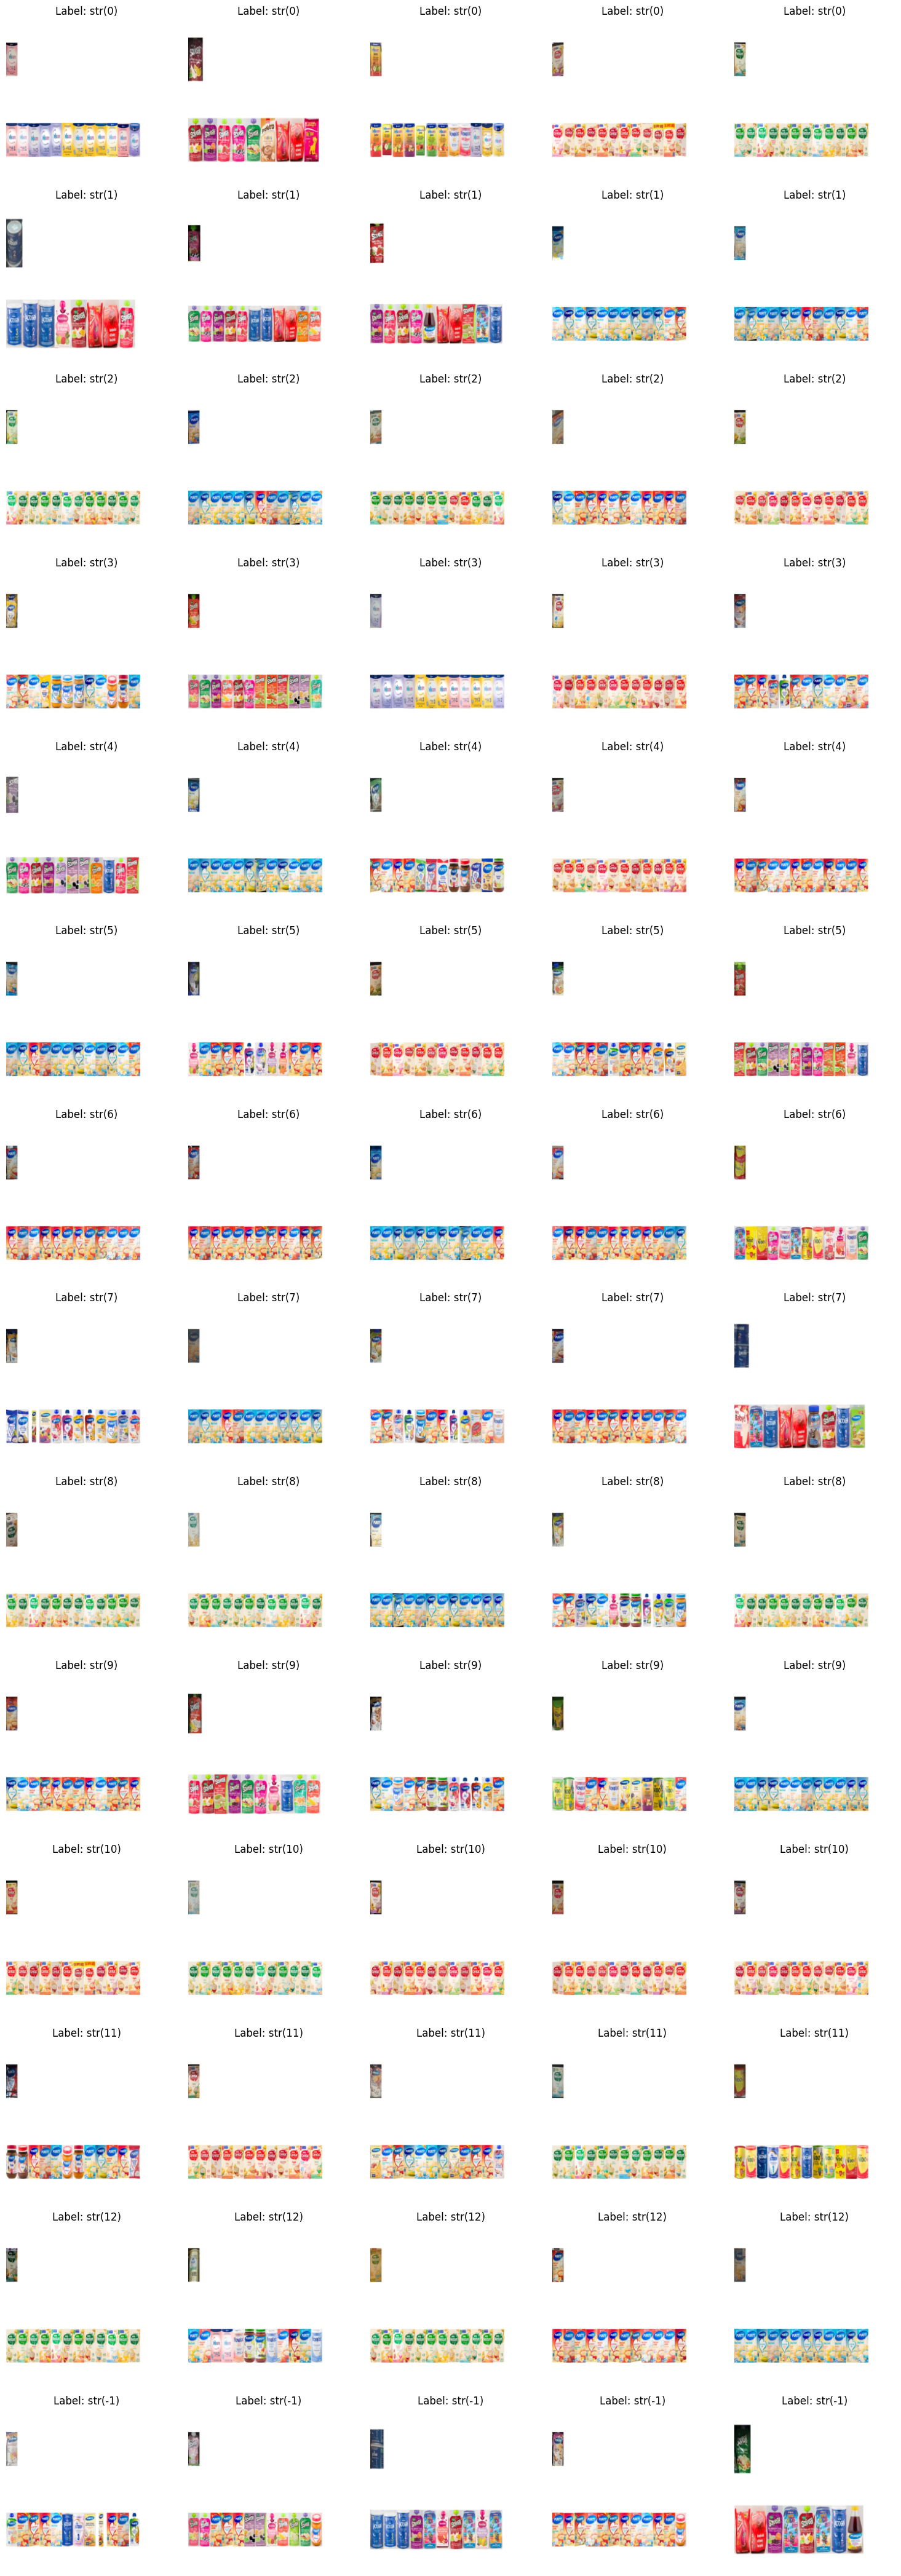

In [61]:
# import random
# import matplotlib.pyplot as plt
# import torchvision
# # Visualize a sample of images from the dataset for each label
# def visualize_dataset(dataset, num_samples_per_label=5):
#     unique_labels = set(dataset.labels.values())
#     print(unique_labels)
#     fig, axes = plt.subplots(len(unique_labels), num_samples_per_label, figsize=(15, 3*len(unique_labels)))

#     for i, label in enumerate(unique_labels):
#         label_indices = [idx for idx, lbl in enumerate(dataset.labels.values()) if lbl == label]
#         sampled_indices = random.sample(label_indices, min(num_samples_per_label, len(label_indices)))
        
#         for j, idx in enumerate(sampled_indices):
#             image, _ = dataset[idx]
#             image = torchvision.transforms.ToPILImage()(image)  # Convert tensor to PIL image
#             axes[i, j].imshow(image)
#             axes[i, j].set_title(f'Label: str({label})')
#             axes[i, j].axis('off')

#     plt.tight_layout()
#     plt.show()

# # Visualize the dataset
# visualize_dataset(custom_dataset1)


In [4]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, labels, transform=None):
        self.root_dir = root_dir
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = list(self.labels.keys())[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        label = self.labels[img_name]
        if self.transform:
            image = self.transform(image)
        return {'image': image, 'text': label}

# Define transformations (only resize)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
])

# Example usage
image_folder = "/home/sdavuluri2/workspace/data/layout"
labels = labels

# Create custom dataset
custom_dataset = CustomDataset(root_dir=image_folder, labels=labels, transform=transform)


In [4]:
custom_dataset

In [14]:
for i in range(5):
    print(custom_dataset[i])

{'image': <PIL.Image.Image image mode=RGB size=256x256 at 0x7F1CE625D050>, 'text': '0'}
{'image': <PIL.Image.Image image mode=RGB size=256x256 at 0x7F1CE4EFF350>, 'text': '2'}
{'image': <PIL.Image.Image image mode=RGB size=256x256 at 0x7F1CE4EFF410>, 'text': '-1'}
{'image': <PIL.Image.Image image mode=RGB size=256x256 at 0x7F1CE4EFF510>, 'text': '0'}
{'image': <PIL.Image.Image image mode=RGB size=256x256 at 0x7F1CE4EFF5D0>, 'text': '2'}


In [5]:
len(custom_dataset)

31689

In [5]:
from transformers import AutoProcessor, Pix2StructForConditionalGeneration

processor = AutoProcessor.from_pretrained("ybelkada/pix2struct-base")
model = Pix2StructForConditionalGeneration.from_pretrained("ybelkada/pix2struct-base")

In [8]:
from torch.utils.data import Dataset, DataLoader

MAX_PATCHES = 1024

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], return_tensors="pt", add_special_tokens=True, max_patches=MAX_PATCHES)
        
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        encoding["text"] = item["text"]
        return encoding

In [6]:
import torch
def collator(batch):
  new_batch = {"flattened_patches":[], "attention_mask":[]}
  texts = [item["text"] for item in batch]
  
  text_inputs = processor(text=texts, padding="max_length", return_tensors="pt", add_special_tokens=True, max_length=20)
  
  new_batch["labels"] = text_inputs.input_ids
  
  for item in batch:
    new_batch["flattened_patches"].append(item["flattened_patches"])
    new_batch["attention_mask"].append(item["attention_mask"])
  
  new_batch["flattened_patches"] = torch.stack(new_batch["flattened_patches"])
  new_batch["attention_mask"] = torch.stack(new_batch["attention_mask"])

  return new_batch

In [9]:
train_dataset = ImageCaptioningDataset(custom_dataset, processor)

In [19]:
for i in range(5):  # Print the first 5 samples
    item = train_dataset[i]
    print("Sample", i+1, ":", item)  # Print the entire item to inspect its structure


Sample 1 : {'flattened_patches': tensor([[ 1.0000,  1.0000,  0.3733,  ...,  0.3733,  0.3733,  0.3733],
        [ 1.0000,  2.0000,  0.3733,  ...,  0.3733,  0.3733,  0.3733],
        [ 1.0000,  3.0000,  0.3733,  ...,  0.3733,  0.3733,  0.3733],
        ...,
        [32.0000, 30.0000,  0.3733,  ...,  0.3733,  0.3733,  0.3733],
        [32.0000, 31.0000,  0.3733,  ...,  0.3733,  0.3733,  0.3733],
        [32.0000, 32.0000,  0.3733,  ...,  0.3733,  0.3733,  0.3733]]), 'attention_mask': tensor([1., 1., 1.,  ..., 1., 1., 1.]), 'text': '0'}
Sample 2 : {'flattened_patches': tensor([[ 1.0000,  1.0000,  0.3865,  ...,  0.3865,  0.3865,  0.3865],
        [ 1.0000,  2.0000,  0.3865,  ...,  0.3865,  0.3865,  0.3865],
        [ 1.0000,  3.0000,  0.3865,  ...,  0.3865,  0.3865,  0.3865],
        ...,
        [32.0000, 30.0000,  0.3865,  ...,  0.3865,  0.3865,  0.3865],
        [32.0000, 31.0000,  0.3865,  ...,  0.3865,  0.3865,  0.3865],
        [32.0000, 32.0000,  0.3865,  ...,  0.3865,  0.3865,  0.38

In [39]:
# def visualize_dataset(data_samples, num_samples_per_label=5):
#     unique_labels={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}
#     fig, axes = plt.subplots(len(unique_labels), num_samples_per_label, figsize=(15, 3*len(unique_labels)))

#     for i, label in enumerate(unique_labels):
#         label_samples = [sample for sample in data_samples if sample['text'] == label]
#         sampled_samples = random.sample(label_samples, min(num_samples_per_label, len(label_samples)))
        
#         for j, sample in enumerate(sampled_samples):
#             # Assuming 'flattened_patches' contains the image tensor
#             image_tensor = sample['flattened_patches']  
#             # Convert tensor to PIL image using torchvision
#             to_pil = transforms.ToPILImage()
#             image = to_pil(image_tensor)
#             print(type(image))
#             axes[i, j].imshow(image)
#             axes[i, j].set_title(f'Text: {label}')
#             axes[i, j].axis('off')

#     plt.tight_layout()
#     plt.show()

# visualize_dataset(train_dataset)

In [11]:
#train_dataset = ImageCaptioningDataset(custom_dataset, processor)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=128, collate_fn=collator)

31689

In [84]:
for batch in train_dataloader:
    print("Batch Contents:", batch)

Batch Contents: {'flattened_patches': tensor([[[ 1.0000,  1.0000,  0.3694,  ...,  0.3694,  0.3694,  0.3694],
         [ 1.0000,  2.0000,  0.3694,  ...,  0.3694,  0.3694,  0.3694],
         [ 1.0000,  3.0000,  0.3694,  ...,  0.3694,  0.3694,  0.3694],
         ...,
         [32.0000, 30.0000,  0.3694,  ...,  0.3694,  0.3694,  0.3694],
         [32.0000, 31.0000,  0.3694,  ...,  0.3694,  0.3694,  0.3694],
         [32.0000, 32.0000,  0.3694,  ...,  0.3694,  0.3694,  0.3694]],

        [[ 1.0000,  1.0000,  0.4062,  ...,  0.4062,  0.4062,  0.4062],
         [ 1.0000,  2.0000,  0.4062,  ...,  0.4062,  0.4062,  0.4062],
         [ 1.0000,  3.0000,  0.4062,  ...,  0.4062,  0.4062,  0.4062],
         ...,
         [32.0000, 30.0000,  0.4062,  ...,  0.4062,  0.4062,  0.4062],
         [32.0000, 31.0000,  0.4062,  ...,  0.4062,  0.4062,  0.4062],
         [32.0000, 32.0000,  0.4062,  ...,  0.4062,  0.4062,  0.4062]],

        [[ 1.0000,  1.0000,  0.3701,  ...,  0.3701,  0.3701,  0.3701],
       

KeyboardInterrupt: 

Fifa

Sample 1 : {'flattened_patches': tensor([[ 1.0000,  1.0000, -1.0742,  ..., -1.0262, -1.0311, -0.9852],
        [ 1.0000,  2.0000, -1.0593,  ..., -1.0364, -1.0302, -0.9877],
        [ 1.0000,  3.0000, -1.0742,  ..., -1.0925, -1.0775, -1.0176],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'attention_mask': tensor([1., 1., 1.,  ..., 0., 0., 0.]), 'text': "Benzema after Real Mardid's win against PSG"}
Sample 2 : {'flattened_patches': tensor([[ 1.0000e+00,  1.0000e+00, -1.3589e+00,  ..., -1.2742e+00,
         -1.1598e+00, -9.9168e-01],
        [ 1.0000e+00,  2.0000e+00, -1.2487e+00,  ..., -1.1625e+00,
         -1.0350e+00, -9.1476e-01],
        [ 1.0000e+00,  3.0000e+00, -1.4803e+00,  ..., -1.2482e+00,
         -1.0594e+00, -9.7182e-01],
        ...,
        [ 3.2000e+01,  3.0000e+01,  6.4599e-01,  ...,  1.5877e+00,
          1.6659e+00,  1.6334e+00],
        [ 3.2000e+01,  3.1000e+01,  5.2899e-01,  ...,  1.2486e+00,
          7.2390e-01,  4.3185e-01],
        [ 3.2000e+01,  3.2000e+01, -1.9112e-02,  ..., -3.7852e-01,
         -6.1322e-01, -7.1586e-01]]), 'attention_mask': tensor([1., 1., 1.,  ..., 1., 1., 1.]), 'text': 'Maradona after winning the 1986 FIFA World Cup with Argentina'}


In [38]:
# Sample 1 : {'flattened_patches': tensor([[ 1.0000,  1.0000, -1.0742,  ..., -1.0262, -1.0311, -0.9852],
#         [ 1.0000,  2.0000, -1.0593,  ..., -1.0364, -1.0302, -0.9877],
#         [ 1.0000,  3.0000, -1.0742,  ..., -1.0925, -1.0775, -1.0176],
#         ...,
#         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
#         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
#         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'attention_mask': tensor([1., 1., 1.,  ..., 0., 0., 0.]), 'text': "Benzema after Real Mardid's win against PSG"}
# Sample 2 : {'flattened_patches': tensor([[ 1.0000e+00,  1.0000e+00, -1.3589e+00,  ..., -1.2742e+00,
#          -1.1598e+00, -9.9168e-01],
#         [ 1.0000e+00,  2.0000e+00, -1.2487e+00,  ..., -1.1625e+00,
#          -1.0350e+00, -9.1476e-01],
#         [ 1.0000e+00,  3.0000e+00, -1.4803e+00,  ..., -1.2482e+00,
#          -1.0594e+00, -9.7182e-01],
#         ...,
#         [ 3.2000e+01,  3.0000e+01,  6.4599e-01,  ...,  1.5877e+00,
#           1.6659e+00,  1.6334e+00],
#         [ 3.2000e+01,  3.1000e+01,  5.2899e-01,  ...,  1.2486e+00,
#           7.2390e-01,  4.3185e-01],
#         [ 3.2000e+01,  3.2000e+01, -1.9112e-02,  ..., -3.7852e-01,
#          -6.1322e-01, -7.1586e-01]]), 'attention_mask': tensor([1., 1., 1.,  ..., 1., 1., 1.]), 'text': 'Maradona after winning the 1986 FIFA World Cup with Argentina'}


In [12]:
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [12]:
import torch

EPOCHS = 500

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(EPOCHS):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    labels = batch.pop("labels").to(device)
    flattened_patches = batch.pop("flattened_patches").to(device)
    attention_mask = batch.pop("attention_mask").to(device)

    outputs = model(flattened_patches=flattened_patches,
                    attention_mask=attention_mask,
                    labels=labels)
    
    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        model.eval()

        predictions = model.generate(flattened_patches=flattened_patches, attention_mask=attention_mask)        
        print("Predictions:", processor.batch_decode(predictions, skip_special_tokens=True))

        model.train()
        

Epoch: 0


OutOfMemoryError: CUDA out of memory. Tried to allocate 6.00 GiB. GPU 0 has a total capacity of 23.64 GiB of which 556.44 MiB is free. Including non-PyTorch memory, this process has 23.09 GiB memory in use. Of the allocated memory 18.04 GiB is allocated by PyTorch, and 4.86 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)